Manufactured Solution experiment based on SAND2000 - 1444

Test based on heat flux example in SAND2000 - 1444 Section 3

In [1]:
%matplotlib inline

In [2]:
import fipy as fp

In [3]:
from sympy import symbols, sin, exp, sqrt, init_printing

In [4]:
from sympy import diff, simplify, Eq, lambdify

In [5]:
init_printing(use_unicode=True)

In [6]:
x, y, z, t = symbols('x y z t')

In [7]:
T0, R, t0, k0, rho0, Cp0 = symbols('T0 R t0 k0 rho0 Cp0')

In [8]:
T_sym = T0 * (1 + sin(x/R)**2) * exp(t*(t0-t)/t0)

In [9]:
k_sym = k0 

In [10]:
rho_sym = rho0 

In [11]:
Cp_sym = Cp0 

In [12]:
g_sym = \
simplify(diff(Cp_sym * rho_sym * T_sym, t)
         - diff(k_sym * diff(T_sym, x), x) 
         - diff(k_sym * diff(T_sym, y), y)
         - diff(k_sym * diff(T_sym, z), z))

In [13]:
g_sym

-T0*(Cp0*R**2*rho0*(2*t - t0)*(sin(x/R)**2 + 1) + 2*k0*t0*cos(2*x/R))*exp(-t*(t - t0)/t0)/(R**2*t0)

In [14]:
subs = [(R, 3.33), (T0, 100), (Cp0, 1), (rho0, 0), (k0, 1), (t0, 1)]

In [15]:
g_sub = g_sym.subs(subs)

In [28]:
g_fp = lambdify((x, t), g_sub, modules=fp.numerix)

In [29]:
T_sub = T_sym.subs(subs)

In [30]:
T_fp = lambdify((x, t), T_sub, modules=fp.numerix)

In [31]:
k_sub = k_sym.subs(subs)

In [32]:
k_fp = lambdify((x, t), k_sub, modules=fp.numerix)

In [33]:
rho_sub = rho_sym.subs(subs)

In [34]:
rho_fp = lambdify((x, t), rho_sub, modules=fp.numerix)

In [35]:
Cp_sub = Cp_sym.subs(subs)

In [36]:
Cp_fp = lambdify((x, t), Cp_sub, modules=fp.numerix)

In [25]:
mesh = fp.Grid1D(Lx=10., dx=.1)

In [26]:
xx = mesh.cellCenters[0]

In [27]:
XX = mesh.faceCenters[0]

In [64]:
T = fp.CellVariable(mesh=mesh, name="$T$", hasOld=True)

In [65]:
T.value = T_fp(xx, 0.)*0.01

In [38]:
time = fp.Variable(name="$t$", value=0.)

In [66]:
T.constrain(T_fp(XX, time), where=mesh.exteriorFaces)

In [67]:
eq = (fp.DiffusionTerm(coeff=k_fp(XX, time)) + g_fp(xx, time)
      == fp.TransientTerm(coeff=rho_fp(xx, time) * Cp_fp(xx, time)))

In [68]:
dt = 0.1

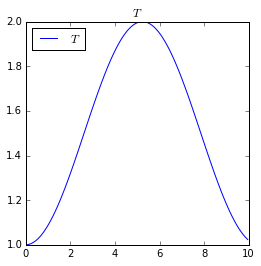

In [69]:
viewer = fp.Viewer(vars=T)

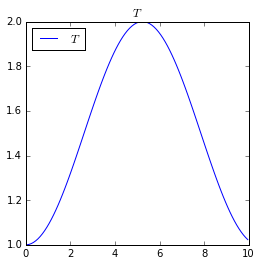

In [70]:
viewer.plot()

In [62]:
time.value = 0.

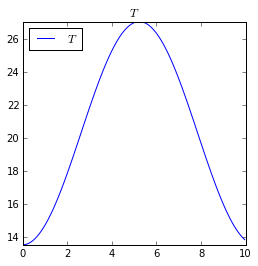

time =  2.0


In [91]:
T.updateOld()
eq.solve(var=T, dt=dt)
viewer.plot()
print "time = ", time
time.value = time() + dt

In [39]:
print min(T)

100.122358862


In [72]:
dT1 = T - T_fp(xx, time)

In [73]:
dT1.name = "$\Delta T_1$"

In [74]:
dT2 = T - T_fp(xx, time - dt)

In [75]:
dT2.name = "$\Delta T_2$"

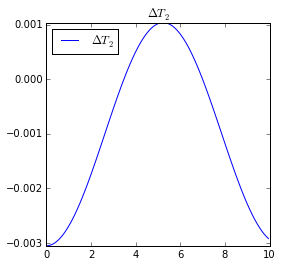

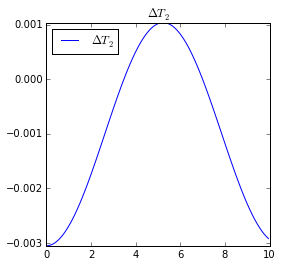

In [92]:
fp.Viewer(vars=(dT2))

In [93]:
fp.numerix.L2norm(dT2)

0.016713886144996391

## $\Delta x = 1$ 

In [101]:
mesh = fp.Grid1D(Lx=10., dx=1.)

In [106]:
xx = mesh.cellCenters[0]

In [107]:
XX = mesh.faceCenters[0]

In [103]:
time = fp.Variable(name="$t$", value=0.)

In [111]:
T = fp.CellVariable(mesh=mesh, name="$T$", hasOld=True)

In [116]:
T.value = T_fp(xx, 0.)*0.01

In [117]:
T.constrain(T_fp(XX, time), where=mesh.exteriorFaces)

In [118]:
eq = (fp.DiffusionTerm(coeff=k_fp(XX, time)) + g_fp(xx, time)
      == fp.TransientTerm(coeff=rho_fp(xx, time) * Cp_fp(xx, time)))

In [119]:
dt = 0.1

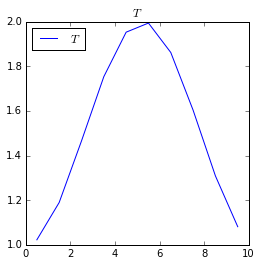

In [120]:
viewer = fp.Viewer(vars=T)

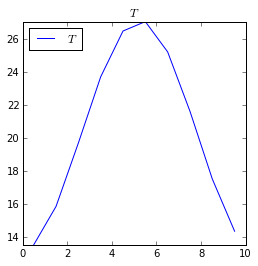

time =  2.0


In [141]:
T.updateOld()
eq.solve(var=T, dt=dt)
viewer.plot()
print "time = ", time
time.value = time() + dt

In [142]:
dT2 = T - T_fp(xx, time - dt)
dT2.name = "$\Delta T_2$"

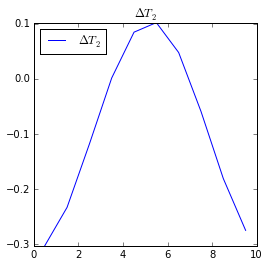

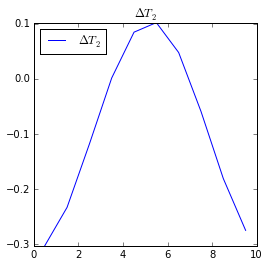

In [143]:
fp.Viewer(vars=(dT2))

In [144]:
fp.numerix.L2norm(dT2)

0.53965371925385019

## $\Delta x = 0.01$ 

In [146]:
mesh = fp.Grid1D(Lx=10., dx=0.01)
xx = mesh.cellCenters[0]
XX = mesh.faceCenters[0]

In [147]:
time = fp.Variable(name="$t$", value=0.)

In [148]:
T = fp.CellVariable(mesh=mesh, name="$T$", hasOld=True)

In [156]:
T.value = T_fp(xx, 0.)*0.01

In [150]:
T.constrain(T_fp(XX, time), where=mesh.exteriorFaces)

In [151]:
eq = (fp.DiffusionTerm(coeff=k_fp(XX, time)) + g_fp(xx, time)
      == fp.TransientTerm(coeff=rho_fp(xx, time) * Cp_fp(xx, time)))

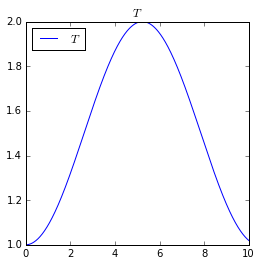

In [152]:
viewer = fp.Viewer(vars=T)

In [157]:
time.value = 0.

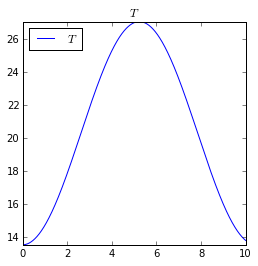

time =  2.0


In [178]:
T.updateOld()
eq.solve(var=T, dt=dt)
viewer.plot()
print "time = ", time
time.value = time() + dt

In [179]:
dT2 = T - T_fp(xx, time - dt)
dT2.name = "$\Delta T_2$"

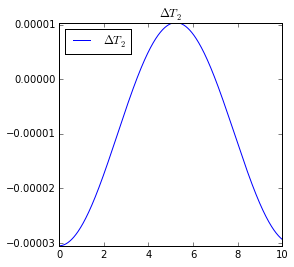

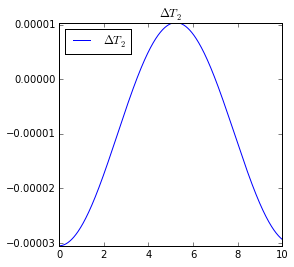

In [180]:
fp.Viewer(vars=(dT2))

In [181]:
fp.numerix.L2norm(dT2)

0.00052842981937143677

## $\Delta x = 0.001$ 

In [191]:
mesh = fp.Grid1D(Lx=10., dx=0.001)
xx = mesh.cellCenters[0]
XX = mesh.faceCenters[0]

In [192]:
time = fp.Variable(name="$t$", value=0.)

In [193]:
T = fp.CellVariable(mesh=mesh, name="$T$", hasOld=True)

In [194]:
T.value = T_fp(xx, 0.)*0.01

In [195]:
T.constrain(T_fp(XX, time), where=mesh.exteriorFaces)

In [196]:
eq = (fp.DiffusionTerm(coeff=k_fp(XX, time)) + g_fp(xx, time)
      == fp.TransientTerm(coeff=rho_fp(xx, time) * Cp_fp(xx, time)))

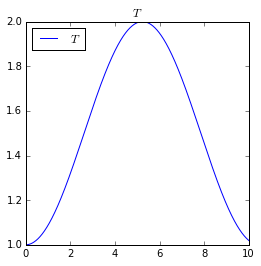

In [197]:
viewer = fp.Viewer(vars=T)

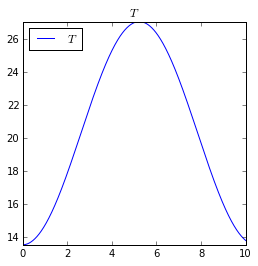

time =  2.0


In [218]:
T.updateOld()
eq.solve(var=T, dt=dt)
viewer.plot()
print "time = ", time
time.value = time() + dt

In [219]:
dT2 = T - T_fp(xx, time - dt)
dT2.name = "$\Delta T_2$"

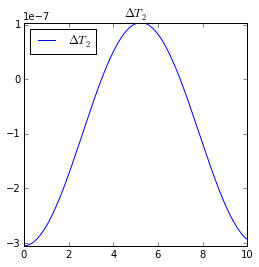

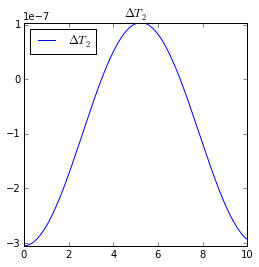

In [220]:
fp.Viewer(vars=(dT2))

In [221]:
fp.numerix.L2norm(dT2)

1.6710384104356988e-05

In [237]:
fp.numerix.L2norm(dT2 * mesh.cellVolumes) / fp.numerix.L2norm(mesh.cellVolumes)

1.6710384104356988e-07

In [254]:
fp.numerix.LINFnorm(dT2)

3.0511411885925099e-07

In [183]:
from matplotlib import pyplot as plt

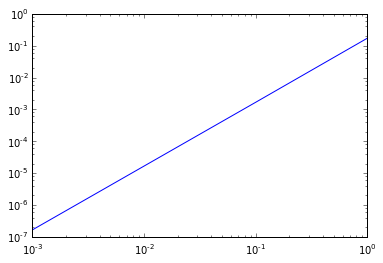

In [233]:
plt.loglog((0.001, 0.01, 0.1, 1.), (1.6710384104356988e-05 / fp.numerix.sqrt(10000), 0.00052842981937143677 / fp.numerix.sqrt(1000), 0.016713886144996391 / fp.numerix.sqrt(100), 0.53965371925385019 / fp.numerix.sqrt(10)))

In [236]:
fp.numerix.log((0.53965371925385019 / fp.numerix.sqrt(10)) / (0.016713886144996391 / fp.numerix.sqrt(100))) / fp.numerix.log(10.)

2.0090377351057418

In [252]:
fp.numerix.log((0.016713886144996391 / fp.numerix.sqrt(100)) /(0.00052842981937143677 / fp.numerix.sqrt(1000))) / fp.numerix.log(10.)

2.000090122492264

In [253]:
fp.numerix.log((0.00052842981937143677 / fp.numerix.sqrt(1000)) / (1.6710384104356988e-05 / fp.numerix.sqrt(10000))) / fp.numerix.log(10.)

2.0000008842474077